In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from scipy import stats
import sklearn as sk
from sklearn import model_selection
import cv2
from google.colab.patches import cv2_imshow

(326, 500, 3)


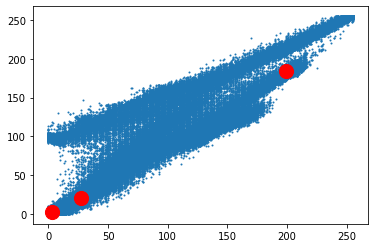

[1. 1. 1. ... 0. 0. 0.]


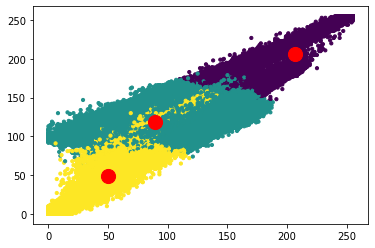

In [ ]:
def kmeans(X, k, iterations):
  centroids = init_centroids(X, k)
  plt.scatter(X[:,0], X[:,1], s = 1)
  plt.scatter(centroids[:,0], centroids[:,1],s = 200, c= "red")
  plt.show()
  
  for i in range(iterations):
    clusters = create_clusters(X, centroids, k)
    previous_centroids = centroids
    centroids = new_centroids(X, clusters, k)

    if np.sum(np.linalg.norm(previous_centroids - centroids)) == 0:
      break
 
  labels = predict(X, clusters)
  return labels, centroids

def init_centroids(X, k):
  centroids = np.zeros((k, X.shape[1]))

  for k in range(k):
    centroids[k] = X[np.random.choice(range(X.shape[0]))] 
  
  return centroids

def create_clusters(X, centroids, k):
  clusters = [[] for _ in range(k)]

  for sample_index, sample in enumerate(X):
    closest_centroid = np.argmin(np.linalg.norm(sample - centroids, axis = 1))
    clusters[closest_centroid].append(sample_index)

  return clusters

def new_centroids(X, clusters, k):
  centroids = np.zeros((k, X.shape[1]))

  for cluster_index, cluster in enumerate(clusters):
    new_centroid = np.mean(X[cluster], axis = 0)
    centroids[cluster_index] = new_centroid 

  return centroids


def predict(X, clusters):
  predictions = np.zeros(X.shape[0])

  for cluster_index, cluster in enumerate(clusters):
    for sample_index in cluster:
      predictions[sample_index] = cluster_index

  return predictions


def main():
  im = cv2.imread("/content/drive/MyDrive/umn_csci.png")
  #im2 = cv2.imread("/content/drive/MyDrive/rubicks.png")
  im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
  print(im.shape)
  X = im.reshape((-1,3))
  k = [3,5,7]
  
  for i in range(1):
    labels, centroids = kmeans(X, 3, 10)
    plt.scatter(X[:,0], X[:,1], s = 10, c = labels)
    plt.scatter(centroids[:,0], centroids[:,1],s = 200, c= "red")
    #segment = np.reshape(labels, (326, 500, 3))
    #plt.imshow(segment)
    plt.show()


if __name__ == "__main__":
  main()